<a href="https://colab.research.google.com/github/Lodia15/Facial-Expression-Recognition-Challenge/blob/main/CNN-SGD-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/yEXkEUqK52Q

**Downloading Kaggle data sets directly into Colab**

Install the kaggle python library

In [1]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lukalodia","key":"51e84cc9e499e0b8f1f7283b85559c1e"}'}

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [4]:
! mkdir ~/.kaggle

If you want to copy the kaggle API credentials to the temporary location... (I recommend placing it on your Google Drive)

In [5]:
#! cp kaggle.json ~/.kaggle/

Upload the json file to Google Drive and then copy to the temporary location.

In [6]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

**Competitions and Datasets are the two types of Kaggle data**

**1. Download competition data**

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [8]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 86% 245M/285M [00:00<00:00, 716MB/s] 
100% 285M/285M [00:02<00:00, 107MB/s]


In [9]:
!pip install torch torchvision torchaudio
!pip install wandb
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [10]:
! unzip challenges-in-representation-learning-facial-expression-recognition-challenge

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


To downloaad specific files, instead of the netire data set



In [11]:
import pandas as pd
import numpy as np

**2. Download datasets (that are not part of competition)**

In [12]:
train_df_t = pd.read_csv('train.csv')

In [13]:
train_df_t.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [14]:
train_df = pd.read_csv('icml_face_data.csv')
train_df.head()


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [15]:
!pip install -q wandb

import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: llodi22 (llodi22-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [16]:
wandb.init(project="facial-expression-recognition", entity=None)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import wandb

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [19]:
class FERDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.fromarray(np.uint8(self.images[idx]))
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

In [20]:
def load_fer2013():
    df = pd.read_csv('icml_face_data.csv')

    emotions = {
        0: 'Angry',
        1: 'Disgust',
        2: 'Fear',
        3: 'Happy',
        4: 'Sad',
        5: 'Surprise',
        6: 'Neutral'
    }

    images = []
    labels = []

    for index, row in df.iterrows():
        pixels = np.array(row[' pixels'].split(), dtype='float32')
        image = pixels.reshape(48, 48)
        label = row['emotion']
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels), emotions

In [21]:
# Advanced augmentation
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.5)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [22]:
# Load and split data
X, y, emotions = load_fer2013()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = FERDataset(X_train, y_train, transform=data_transforms)
val_dataset = FERDataset(X_val, y_val, transform=data_transforms)

In [23]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [24]:
class EnhancedFERModel(nn.Module):
    def __init__(self, num_classes=7):
        super(EnhancedFERModel, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='leaky_relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = EnhancedFERModel(num_classes=len(emotions)).to(device)

In [25]:
optimizer = optim.SGD(model.parameters(),
                     lr=0.01,
                     momentum=0.9,
                     weight_decay=1e-4,
                     nesterov=True)

# Cosine Annealing Learning Rate Scheduler
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=1e-5)

In [26]:
# Focal Loss for class imbalance
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = nn.functional.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        loss = (1 - pt) ** self.gamma * ce_loss
        if self.alpha is not None:
            loss = self.alpha[targets] * loss
        return loss.mean()

# Class weights (adjust according to your dataset)
class_weights = torch.tensor([1.0, 1.5, 1.2, 0.9, 1.3, 0.9, 1.0]).to(device)
criterion = FocalLoss(alpha=class_weights, gamma=2.0)

In [27]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    best_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # Validation
        val_loss, val_acc = evaluate_model(model, val_loader, criterion)

        # Log metrics to W&B
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc,
            "learning_rate": optimizer.param_groups[0]['lr']
        })

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}')

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

        scheduler.step()

    print(f'Best Validation Accuracy: {best_acc:.4f}')

In [28]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=emotions.values(), yticklabels=emotions.values())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(all_labels, all_preds, target_names=emotions.values()))

    return loss, accuracy

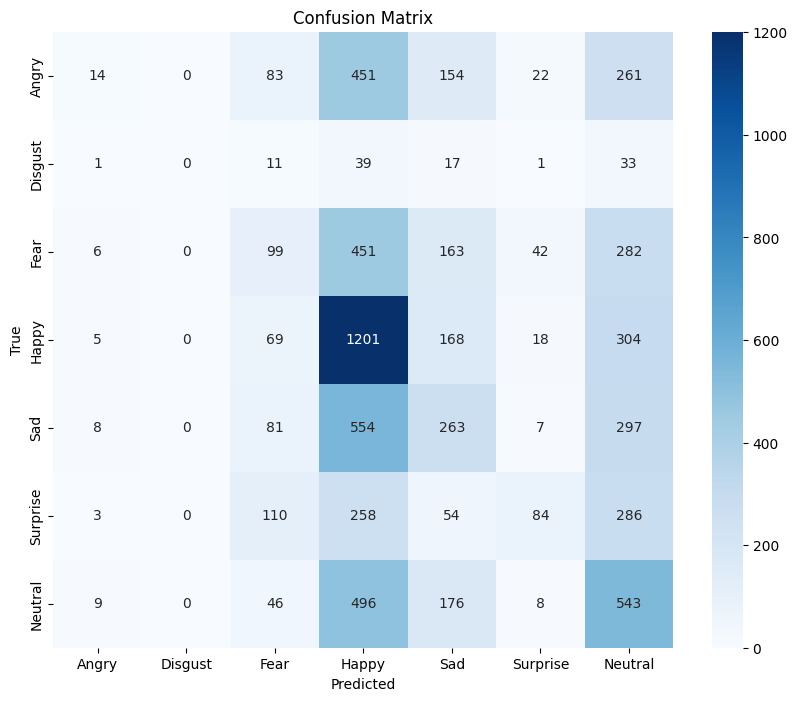

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       Angry       0.30      0.01      0.03       985
     Disgust       0.00      0.00      0.00       102
        Fear       0.20      0.09      0.13      1043
       Happy       0.35      0.68      0.46      1765
         Sad       0.26      0.22      0.24      1210
    Surprise       0.46      0.11      0.17       795
     Neutral       0.27      0.42      0.33      1278

    accuracy                           0.31      7178
   macro avg       0.26      0.22      0.19      7178
weighted avg       0.30      0.31      0.25      7178

Epoch 1:
Train Loss: 1.3945, Acc: 0.2400
Val Loss: 1.2651, Acc: 0.3070
LR: 0.009939


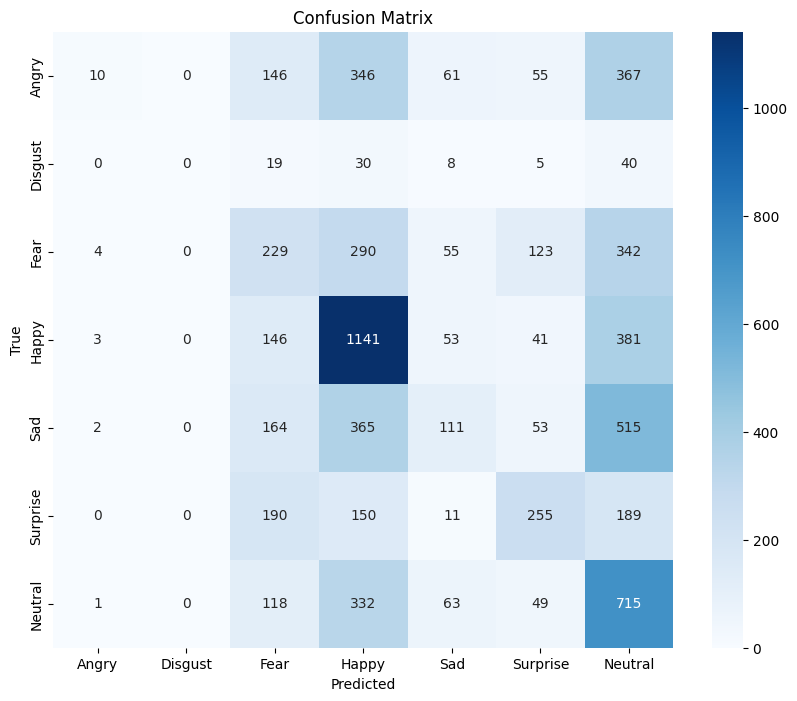

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       Angry       0.50      0.01      0.02       985
     Disgust       0.00      0.00      0.00       102
        Fear       0.23      0.22      0.22      1043
       Happy       0.43      0.65      0.52      1765
         Sad       0.31      0.09      0.14      1210
    Surprise       0.44      0.32      0.37       795
     Neutral       0.28      0.56      0.37      1278

    accuracy                           0.34      7178
   macro avg       0.31      0.26      0.23      7178
weighted avg       0.36      0.34      0.29      7178

Epoch 2:
Train Loss: 1.2891, Acc: 0.2889
Val Loss: 1.2116, Acc: 0.3429
LR: 0.009756


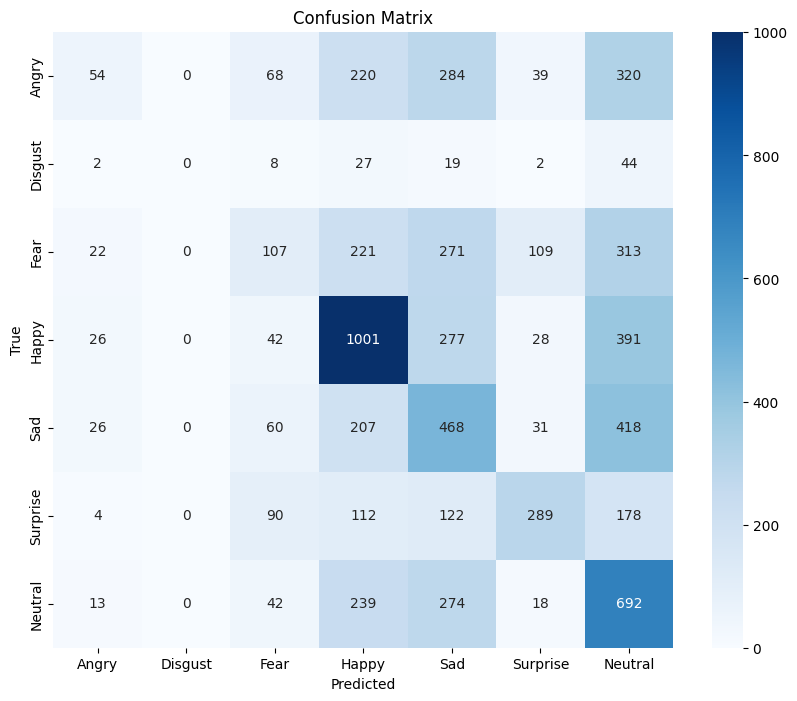

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       Angry       0.37      0.05      0.10       985
     Disgust       0.00      0.00      0.00       102
        Fear       0.26      0.10      0.15      1043
       Happy       0.49      0.57      0.53      1765
         Sad       0.27      0.39      0.32      1210
    Surprise       0.56      0.36      0.44       795
     Neutral       0.29      0.54      0.38      1278

    accuracy                           0.36      7178
   macro avg       0.32      0.29      0.27      7178
weighted avg       0.37      0.36      0.33      7178

Epoch 3:
Train Loss: 1.2186, Acc: 0.3314
Val Loss: 1.1564, Acc: 0.3638
LR: 0.009456


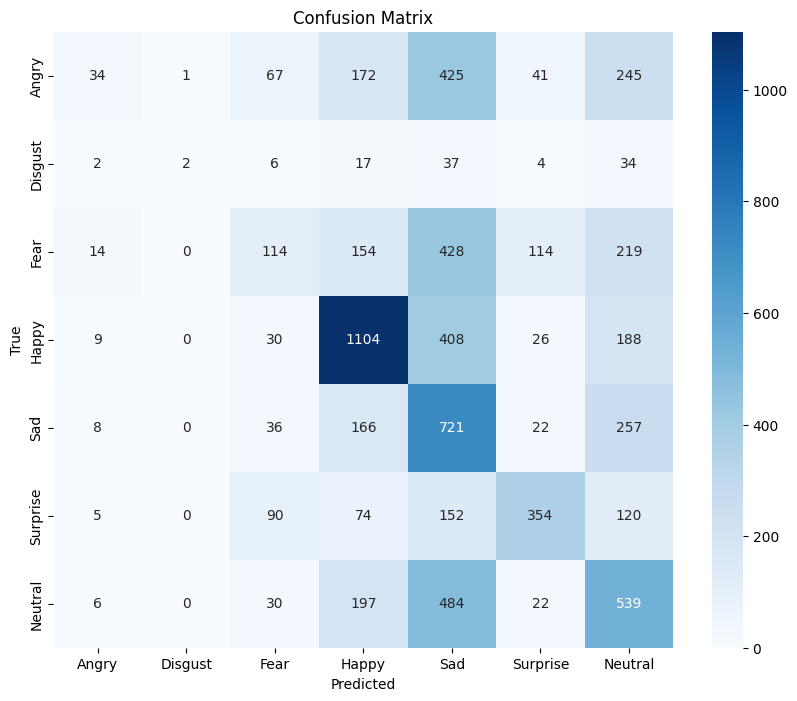

              precision    recall  f1-score   support

       Angry       0.44      0.03      0.06       985
     Disgust       0.67      0.02      0.04       102
        Fear       0.31      0.11      0.16      1043
       Happy       0.59      0.63      0.61      1765
         Sad       0.27      0.60      0.37      1210
    Surprise       0.61      0.45      0.51       795
     Neutral       0.34      0.42      0.37      1278

    accuracy                           0.40      7178
   macro avg       0.46      0.32      0.30      7178
weighted avg       0.43      0.40      0.37      7178

Epoch 4:
Train Loss: 1.1800, Acc: 0.3514
Val Loss: 1.0909, Acc: 0.3996
LR: 0.009046


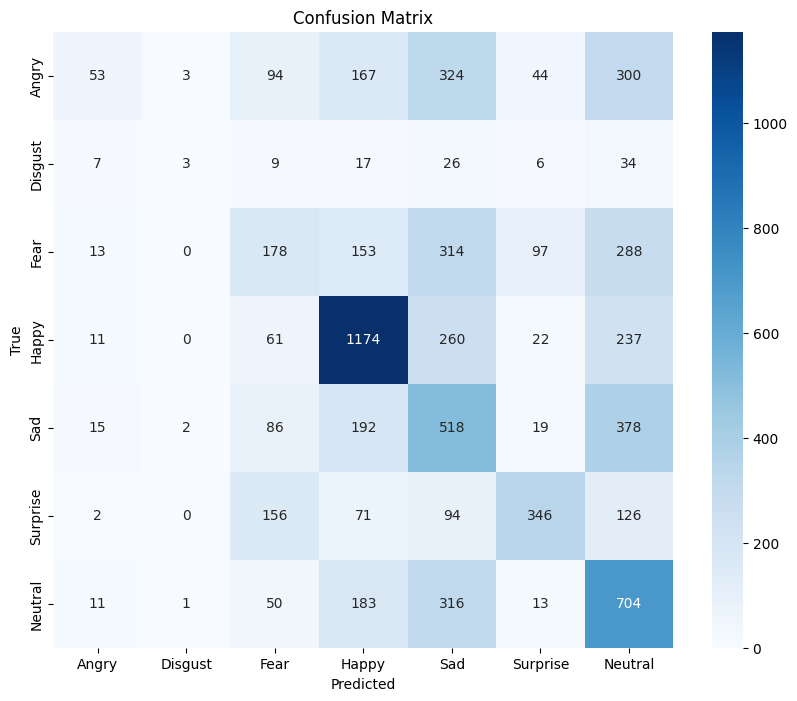

              precision    recall  f1-score   support

       Angry       0.47      0.05      0.10       985
     Disgust       0.33      0.03      0.05       102
        Fear       0.28      0.17      0.21      1043
       Happy       0.60      0.67      0.63      1765
         Sad       0.28      0.43      0.34      1210
    Surprise       0.63      0.44      0.52       795
     Neutral       0.34      0.55      0.42      1278

    accuracy                           0.41      7178
   macro avg       0.42      0.33      0.32      7178
weighted avg       0.44      0.41      0.39      7178

Epoch 5:
Train Loss: 1.1332, Acc: 0.3749
Val Loss: 1.0627, Acc: 0.4146
LR: 0.008537


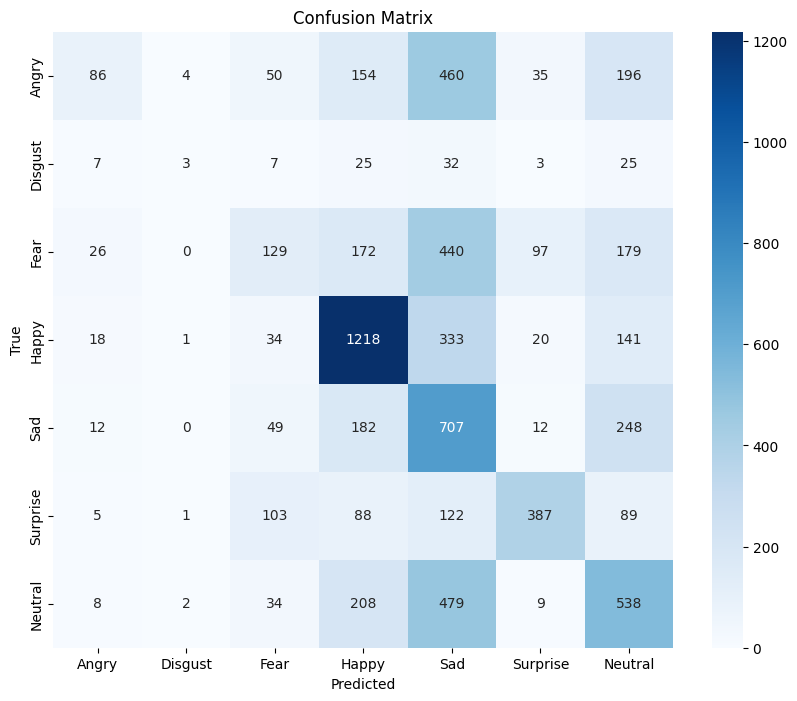

              precision    recall  f1-score   support

       Angry       0.53      0.09      0.15       985
     Disgust       0.27      0.03      0.05       102
        Fear       0.32      0.12      0.18      1043
       Happy       0.60      0.69      0.64      1765
         Sad       0.27      0.58      0.37      1210
    Surprise       0.69      0.49      0.57       795
     Neutral       0.38      0.42      0.40      1278

    accuracy                           0.43      7178
   macro avg       0.44      0.35      0.34      7178
weighted avg       0.46      0.43      0.40      7178

Epoch 6:
Train Loss: 1.0995, Acc: 0.3938
Val Loss: 1.0342, Acc: 0.4274
LR: 0.007941


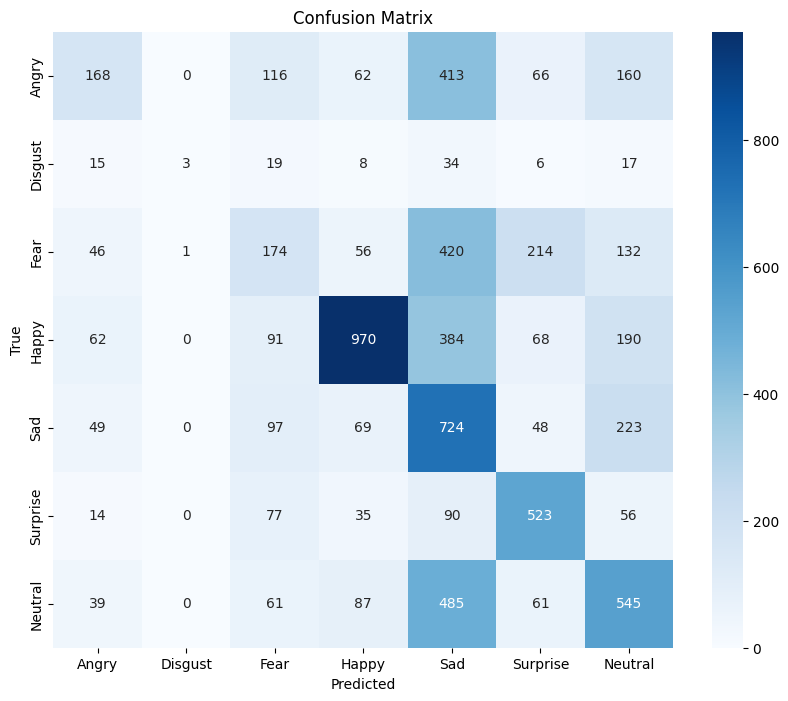

              precision    recall  f1-score   support

       Angry       0.43      0.17      0.24       985
     Disgust       0.75      0.03      0.06       102
        Fear       0.27      0.17      0.21      1043
       Happy       0.75      0.55      0.64      1765
         Sad       0.28      0.60      0.39      1210
    Surprise       0.53      0.66      0.59       795
     Neutral       0.41      0.43      0.42      1278

    accuracy                           0.43      7178
   macro avg       0.49      0.37      0.36      7178
weighted avg       0.47      0.43      0.43      7178

Epoch 7:
Train Loss: 1.0691, Acc: 0.4068
Val Loss: 1.0202, Acc: 0.4329
LR: 0.007273


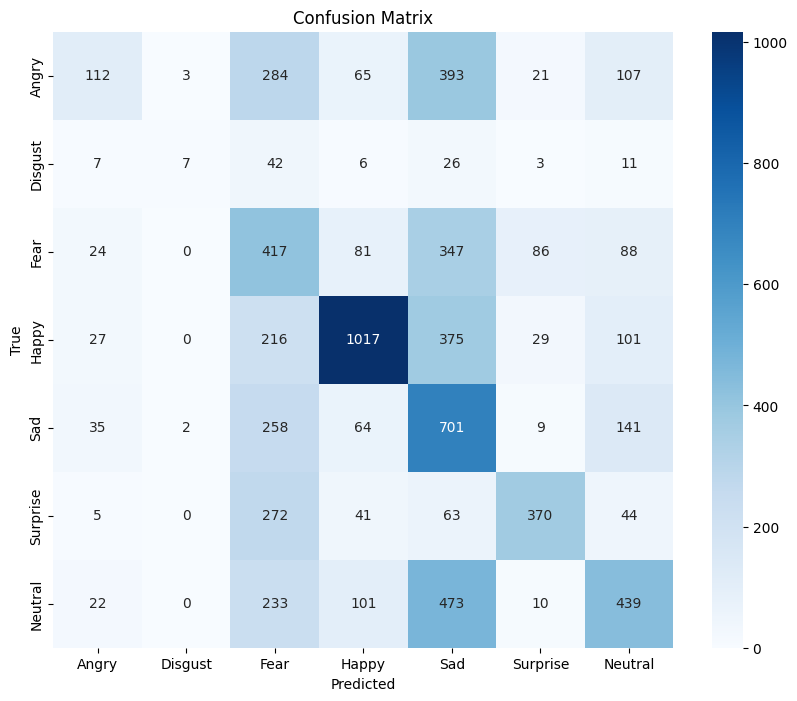

              precision    recall  f1-score   support

       Angry       0.48      0.11      0.18       985
     Disgust       0.58      0.07      0.12       102
        Fear       0.24      0.40      0.30      1043
       Happy       0.74      0.58      0.65      1765
         Sad       0.29      0.58      0.39      1210
    Surprise       0.70      0.47      0.56       795
     Neutral       0.47      0.34      0.40      1278

    accuracy                           0.43      7178
   macro avg       0.50      0.36      0.37      7178
weighted avg       0.50      0.43      0.43      7178

Epoch 8:
Train Loss: 1.0406, Acc: 0.4205
Val Loss: 0.9838, Acc: 0.4267
LR: 0.006549


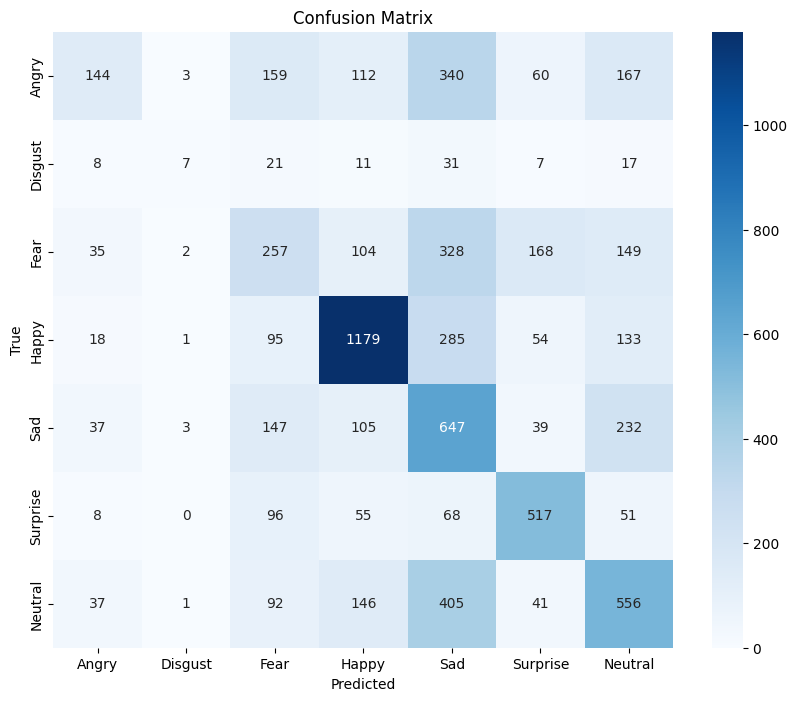

              precision    recall  f1-score   support

       Angry       0.50      0.15      0.23       985
     Disgust       0.41      0.07      0.12       102
        Fear       0.30      0.25      0.27      1043
       Happy       0.69      0.67      0.68      1765
         Sad       0.31      0.53      0.39      1210
    Surprise       0.58      0.65      0.62       795
     Neutral       0.43      0.44      0.43      1278

    accuracy                           0.46      7178
   macro avg       0.46      0.39      0.39      7178
weighted avg       0.48      0.46      0.45      7178

Epoch 9:
Train Loss: 1.0198, Acc: 0.4318
Val Loss: 0.9615, Acc: 0.4607
LR: 0.005786


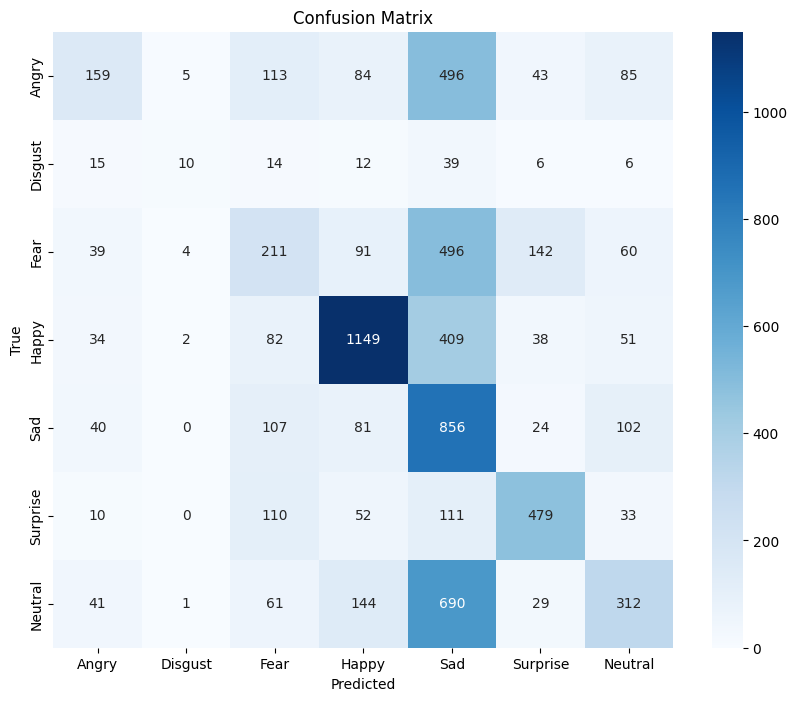

              precision    recall  f1-score   support

       Angry       0.47      0.16      0.24       985
     Disgust       0.45      0.10      0.16       102
        Fear       0.30      0.20      0.24      1043
       Happy       0.71      0.65      0.68      1765
         Sad       0.28      0.71      0.40      1210
    Surprise       0.63      0.60      0.62       795
     Neutral       0.48      0.24      0.32      1278

    accuracy                           0.44      7178
   macro avg       0.48      0.38      0.38      7178
weighted avg       0.49      0.44      0.43      7178

Epoch 10:
Train Loss: 0.9972, Acc: 0.4422
Val Loss: 0.9605, Acc: 0.4425
LR: 0.005005


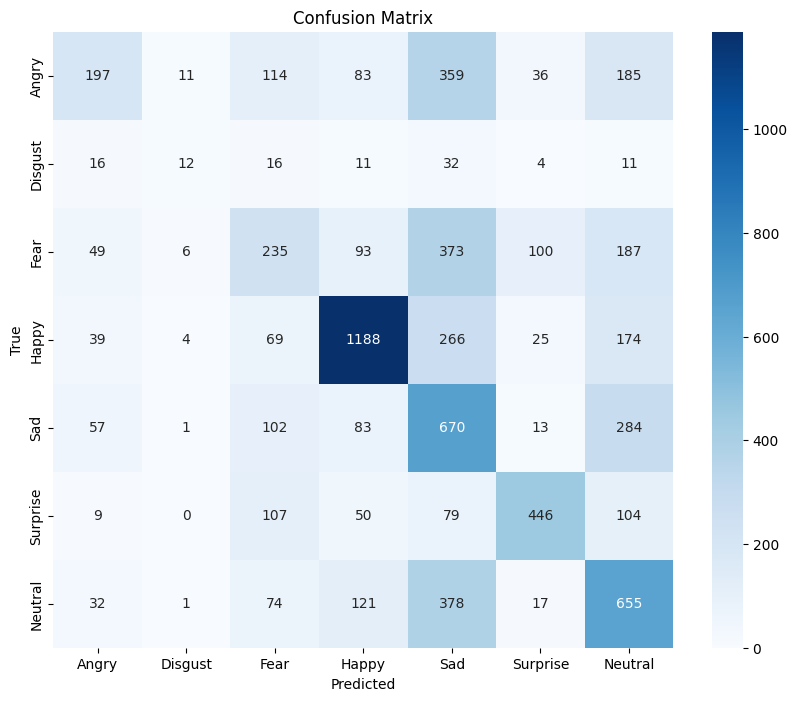

              precision    recall  f1-score   support

       Angry       0.49      0.20      0.28       985
     Disgust       0.34      0.12      0.18       102
        Fear       0.33      0.23      0.27      1043
       Happy       0.73      0.67      0.70      1765
         Sad       0.31      0.55      0.40      1210
    Surprise       0.70      0.56      0.62       795
     Neutral       0.41      0.51      0.46      1278

    accuracy                           0.47      7178
   macro avg       0.47      0.41      0.41      7178
weighted avg       0.50      0.47      0.47      7178

Epoch 11:
Train Loss: 0.9868, Acc: 0.4505
Val Loss: 0.9256, Acc: 0.4741
LR: 0.004224


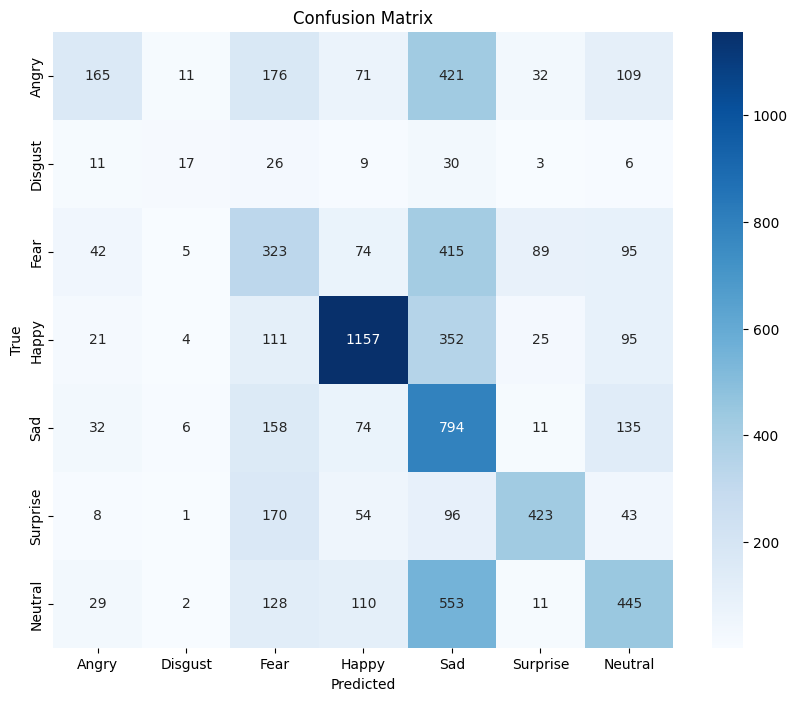

              precision    recall  f1-score   support

       Angry       0.54      0.17      0.26       985
     Disgust       0.37      0.17      0.23       102
        Fear       0.30      0.31      0.30      1043
       Happy       0.75      0.66      0.70      1765
         Sad       0.30      0.66      0.41      1210
    Surprise       0.71      0.53      0.61       795
     Neutral       0.48      0.35      0.40      1278

    accuracy                           0.46      7178
   macro avg       0.49      0.41      0.42      7178
weighted avg       0.52      0.46      0.46      7178

Epoch 12:
Train Loss: 0.9680, Acc: 0.4576
Val Loss: 0.9284, Acc: 0.4631
LR: 0.003461


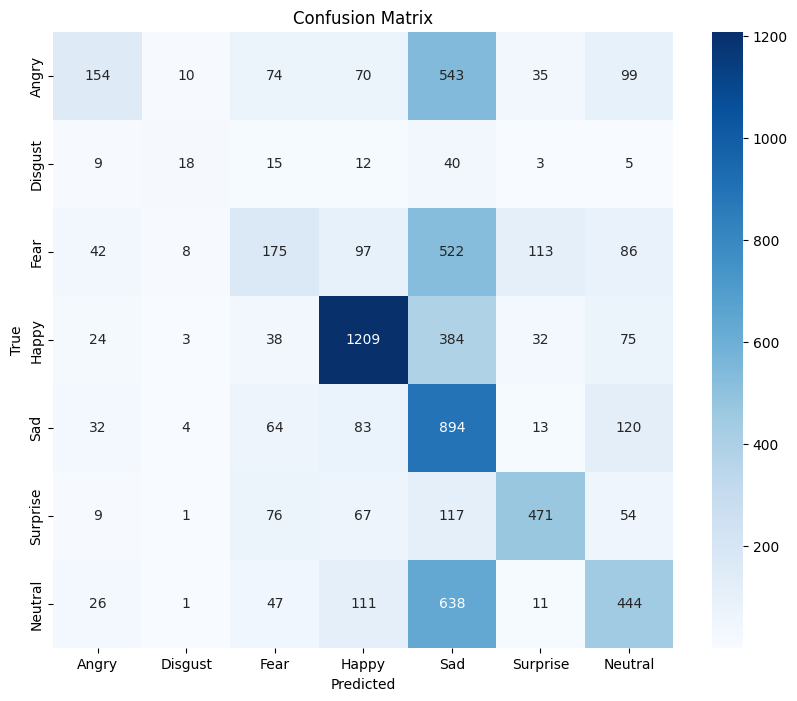

              precision    recall  f1-score   support

       Angry       0.52      0.16      0.24       985
     Disgust       0.40      0.18      0.24       102
        Fear       0.36      0.17      0.23      1043
       Happy       0.73      0.68      0.71      1765
         Sad       0.28      0.74      0.41      1210
    Surprise       0.69      0.59      0.64       795
     Neutral       0.50      0.35      0.41      1278

    accuracy                           0.47      7178
   macro avg       0.50      0.41      0.41      7178
weighted avg       0.52      0.47      0.46      7178

Epoch 13:
Train Loss: 0.9560, Acc: 0.4626
Val Loss: 0.9084, Acc: 0.4688
LR: 0.002737


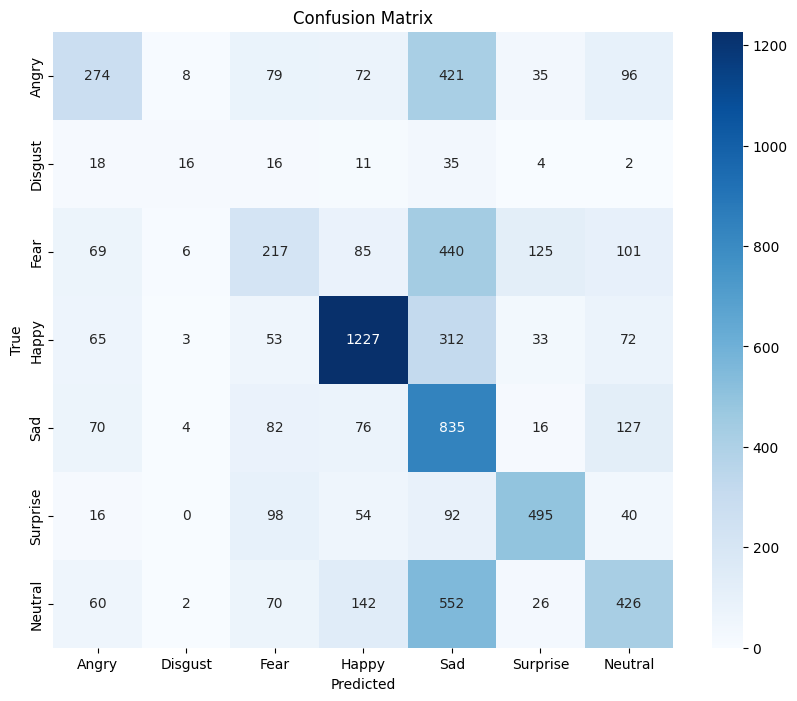

              precision    recall  f1-score   support

       Angry       0.48      0.28      0.35       985
     Disgust       0.41      0.16      0.23       102
        Fear       0.35      0.21      0.26      1043
       Happy       0.74      0.70      0.72      1765
         Sad       0.31      0.69      0.43      1210
    Surprise       0.67      0.62      0.65       795
     Neutral       0.49      0.33      0.40      1278

    accuracy                           0.49      7178
   macro avg       0.49      0.43      0.43      7178
weighted avg       0.52      0.49      0.48      7178

Epoch 14:
Train Loss: 0.9409, Acc: 0.4676
Val Loss: 0.8936, Acc: 0.4862
LR: 0.002069


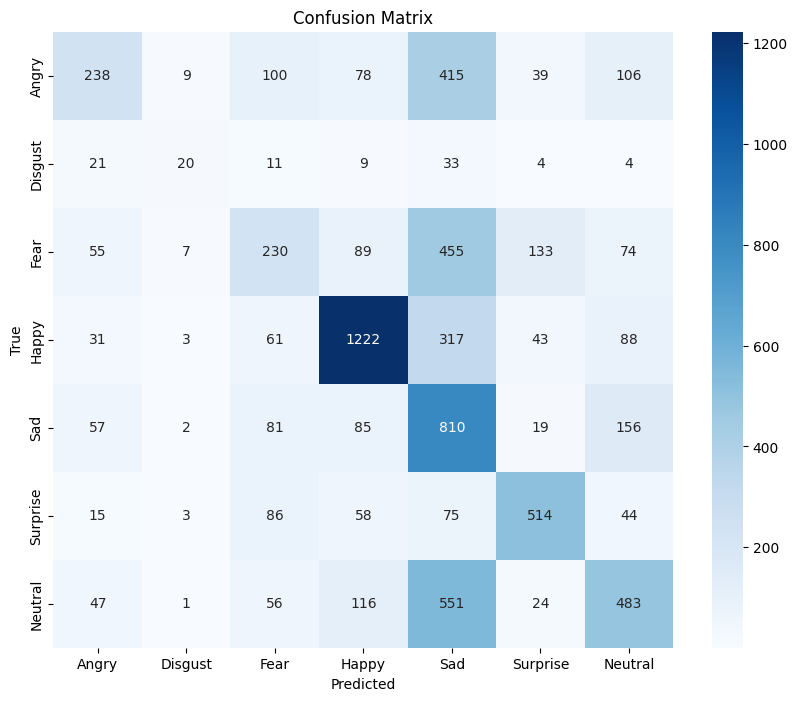

              precision    recall  f1-score   support

       Angry       0.51      0.24      0.33       985
     Disgust       0.44      0.20      0.27       102
        Fear       0.37      0.22      0.28      1043
       Happy       0.74      0.69      0.71      1765
         Sad       0.30      0.67      0.42      1210
    Surprise       0.66      0.65      0.65       795
     Neutral       0.51      0.38      0.43      1278

    accuracy                           0.49      7178
   macro avg       0.51      0.43      0.44      7178
weighted avg       0.53      0.49      0.48      7178

Epoch 15:
Train Loss: 0.9281, Acc: 0.4745
Val Loss: 0.8823, Acc: 0.4900
LR: 0.001473


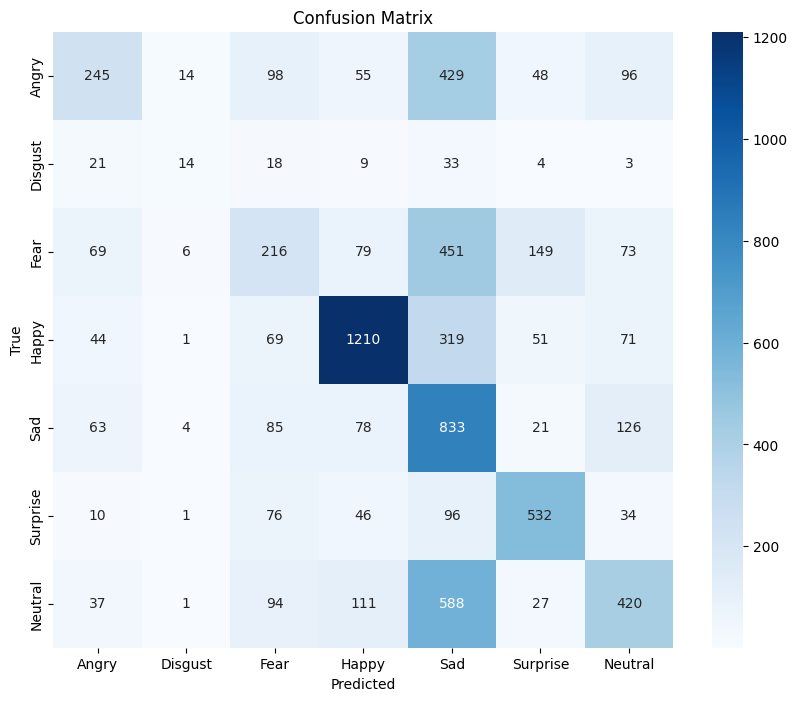

              precision    recall  f1-score   support

       Angry       0.50      0.25      0.33       985
     Disgust       0.34      0.14      0.20       102
        Fear       0.33      0.21      0.25      1043
       Happy       0.76      0.69      0.72      1765
         Sad       0.30      0.69      0.42      1210
    Surprise       0.64      0.67      0.65       795
     Neutral       0.51      0.33      0.40      1278

    accuracy                           0.48      7178
   macro avg       0.48      0.42      0.43      7178
weighted avg       0.52      0.48      0.48      7178

Epoch 16:
Train Loss: 0.9200, Acc: 0.4804
Val Loss: 0.8876, Acc: 0.4834
LR: 0.000964


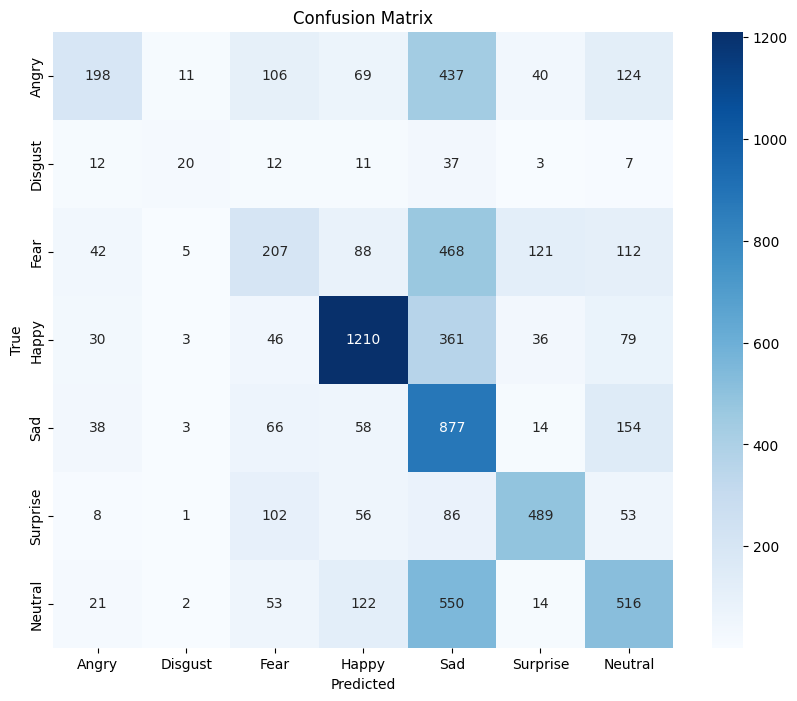

              precision    recall  f1-score   support

       Angry       0.57      0.20      0.30       985
     Disgust       0.44      0.20      0.27       102
        Fear       0.35      0.20      0.25      1043
       Happy       0.75      0.69      0.72      1765
         Sad       0.31      0.72      0.44      1210
    Surprise       0.68      0.62      0.65       795
     Neutral       0.49      0.40      0.44      1278

    accuracy                           0.49      7178
   macro avg       0.51      0.43      0.44      7178
weighted avg       0.54      0.49      0.48      7178

Epoch 17:
Train Loss: 0.9173, Acc: 0.4803
Val Loss: 0.8880, Acc: 0.4900
LR: 0.000554


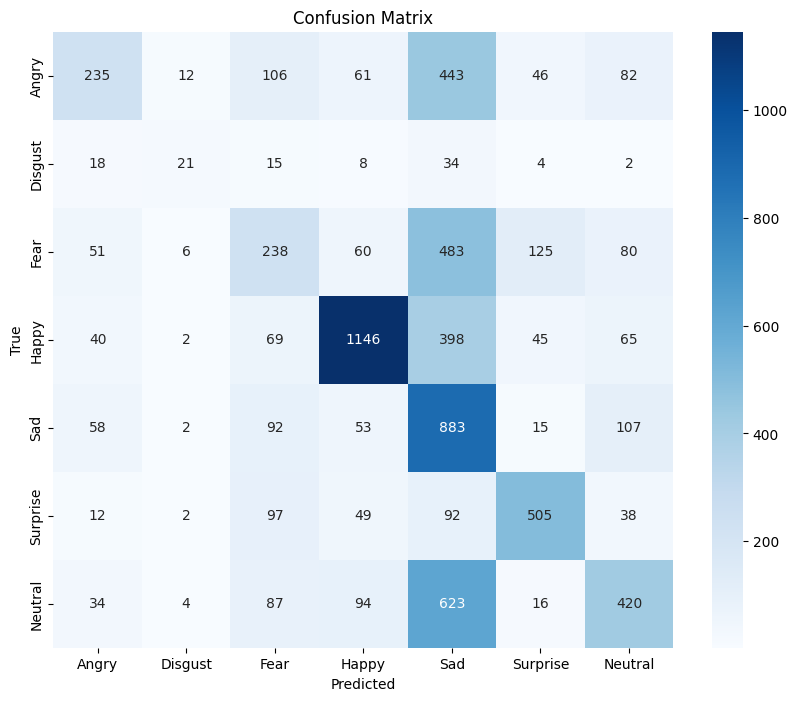

              precision    recall  f1-score   support

       Angry       0.52      0.24      0.33       985
     Disgust       0.43      0.21      0.28       102
        Fear       0.34      0.23      0.27      1043
       Happy       0.78      0.65      0.71      1765
         Sad       0.30      0.73      0.42      1210
    Surprise       0.67      0.64      0.65       795
     Neutral       0.53      0.33      0.41      1278

    accuracy                           0.48      7178
   macro avg       0.51      0.43      0.44      7178
weighted avg       0.54      0.48      0.48      7178

Epoch 18:
Train Loss: 0.9103, Acc: 0.4842
Val Loss: 0.8912, Acc: 0.4804
LR: 0.000254


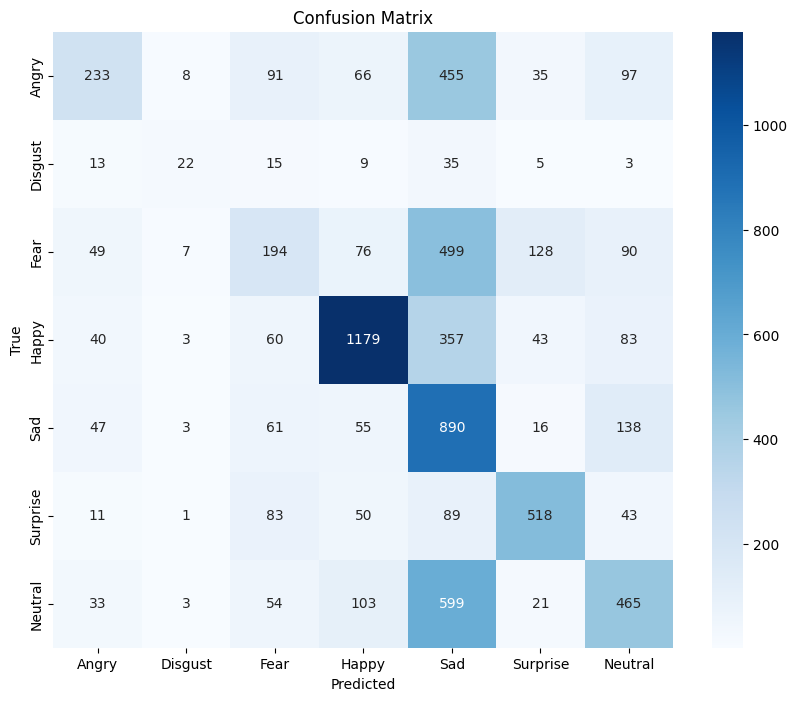

              precision    recall  f1-score   support

       Angry       0.55      0.24      0.33       985
     Disgust       0.47      0.22      0.30       102
        Fear       0.35      0.19      0.24      1043
       Happy       0.77      0.67      0.71      1765
         Sad       0.30      0.74      0.43      1210
    Surprise       0.68      0.65      0.66       795
     Neutral       0.51      0.36      0.42      1278

    accuracy                           0.49      7178
   macro avg       0.52      0.44      0.44      7178
weighted avg       0.54      0.49      0.48      7178

Epoch 19:
Train Loss: 0.9150, Acc: 0.4844
Val Loss: 0.8811, Acc: 0.4877
LR: 0.000071


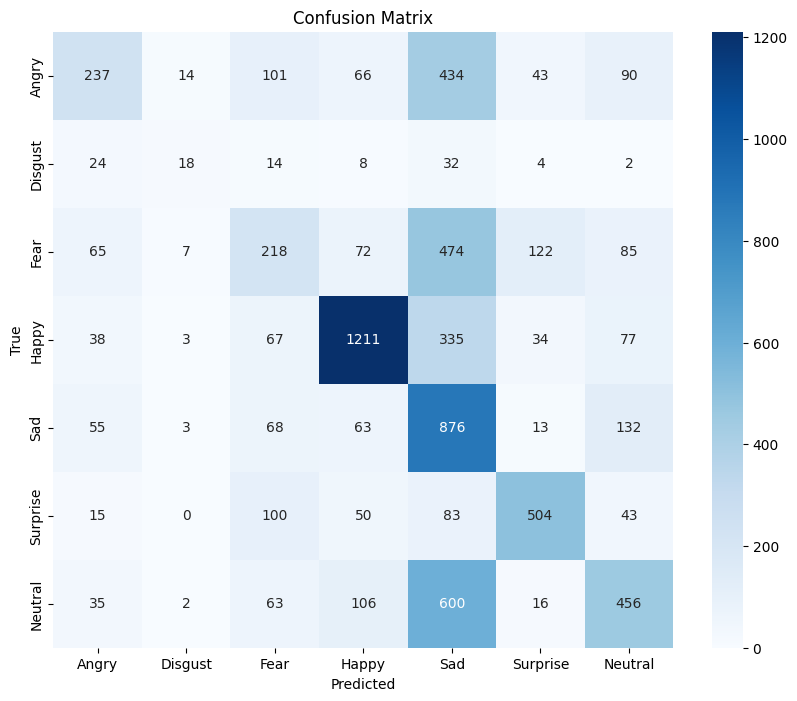

              precision    recall  f1-score   support

       Angry       0.51      0.24      0.33       985
     Disgust       0.38      0.18      0.24       102
        Fear       0.35      0.21      0.26      1043
       Happy       0.77      0.69      0.72      1765
         Sad       0.31      0.72      0.43      1210
    Surprise       0.68      0.63      0.66       795
     Neutral       0.52      0.36      0.42      1278

    accuracy                           0.49      7178
   macro avg       0.50      0.43      0.44      7178
weighted avg       0.53      0.49      0.49      7178

Epoch 20:
Train Loss: 0.9087, Acc: 0.4840
Val Loss: 0.8731, Acc: 0.4904
LR: 0.000010


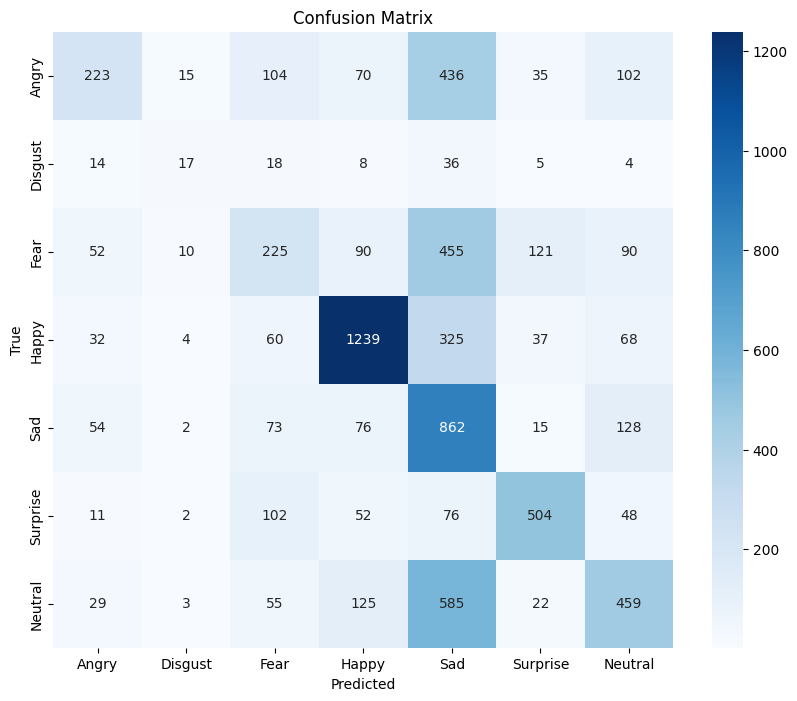

              precision    recall  f1-score   support

       Angry       0.54      0.23      0.32       985
     Disgust       0.32      0.17      0.22       102
        Fear       0.35      0.22      0.27      1043
       Happy       0.75      0.70      0.72      1765
         Sad       0.31      0.71      0.43      1210
    Surprise       0.68      0.63      0.66       795
     Neutral       0.51      0.36      0.42      1278

    accuracy                           0.49      7178
   macro avg       0.49      0.43      0.43      7178
weighted avg       0.53      0.49      0.48      7178

Epoch 21:
Train Loss: 0.9089, Acc: 0.4879
Val Loss: 0.8765, Acc: 0.4916
LR: 0.000071


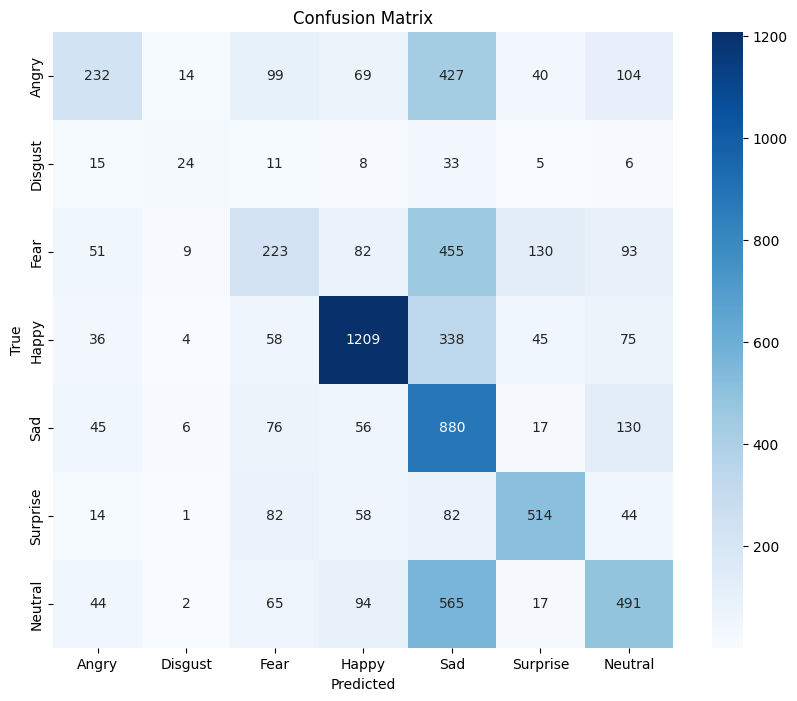

              precision    recall  f1-score   support

       Angry       0.53      0.24      0.33       985
     Disgust       0.40      0.24      0.30       102
        Fear       0.36      0.21      0.27      1043
       Happy       0.77      0.68      0.72      1765
         Sad       0.32      0.73      0.44      1210
    Surprise       0.67      0.65      0.66       795
     Neutral       0.52      0.38      0.44      1278

    accuracy                           0.50      7178
   macro avg       0.51      0.45      0.45      7178
weighted avg       0.54      0.50      0.49      7178

Epoch 22:
Train Loss: 0.9083, Acc: 0.4845
Val Loss: 0.8739, Acc: 0.4978
LR: 0.000254


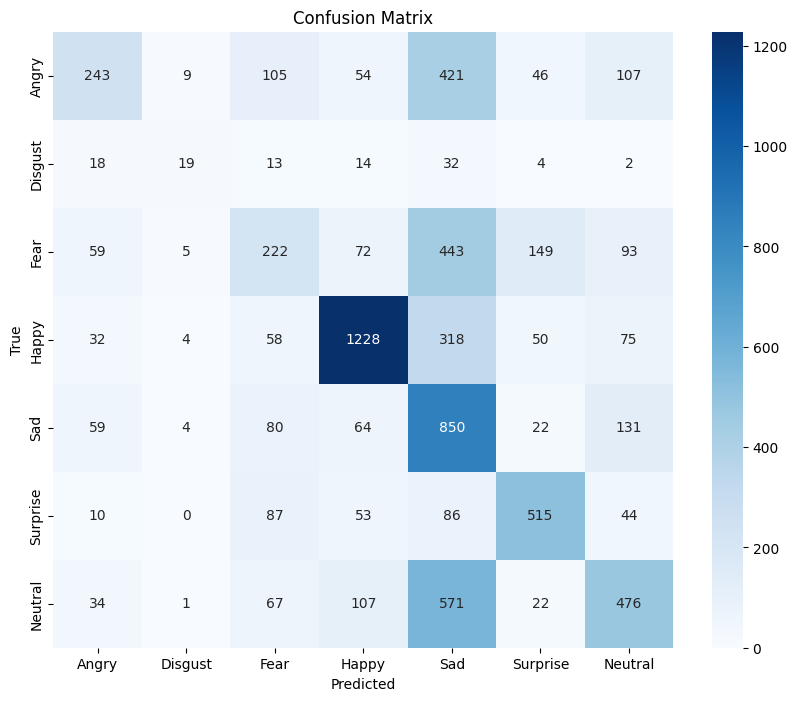

              precision    recall  f1-score   support

       Angry       0.53      0.25      0.34       985
     Disgust       0.45      0.19      0.26       102
        Fear       0.35      0.21      0.27      1043
       Happy       0.77      0.70      0.73      1765
         Sad       0.31      0.70      0.43      1210
    Surprise       0.64      0.65      0.64       795
     Neutral       0.51      0.37      0.43      1278

    accuracy                           0.49      7178
   macro avg       0.51      0.44      0.44      7178
weighted avg       0.54      0.49      0.49      7178

Epoch 23:
Train Loss: 0.9044, Acc: 0.4854
Val Loss: 0.8731, Acc: 0.4950
LR: 0.000554


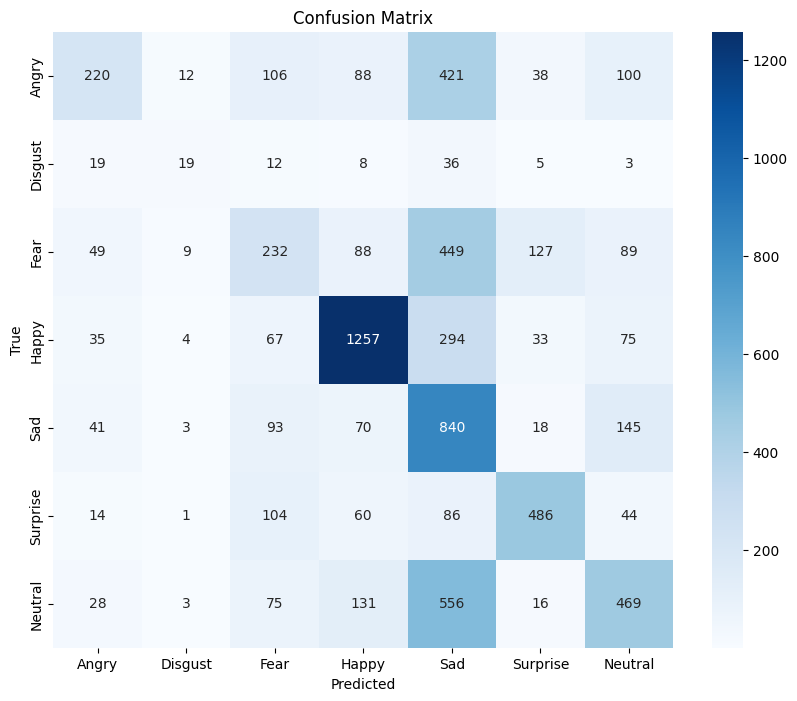

              precision    recall  f1-score   support

       Angry       0.54      0.22      0.32       985
     Disgust       0.37      0.19      0.25       102
        Fear       0.34      0.22      0.27      1043
       Happy       0.74      0.71      0.73      1765
         Sad       0.31      0.69      0.43      1210
    Surprise       0.67      0.61      0.64       795
     Neutral       0.51      0.37      0.43      1278

    accuracy                           0.49      7178
   macro avg       0.50      0.43      0.44      7178
weighted avg       0.53      0.49      0.48      7178

Epoch 24:
Train Loss: 0.9100, Acc: 0.4834
Val Loss: 0.8684, Acc: 0.4908
LR: 0.000964


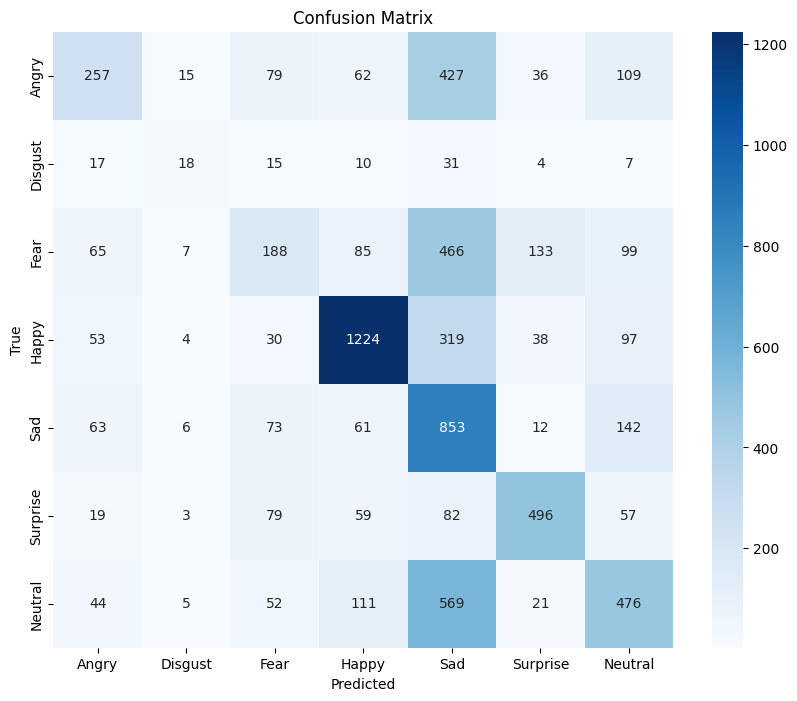

              precision    recall  f1-score   support

       Angry       0.50      0.26      0.34       985
     Disgust       0.31      0.18      0.23       102
        Fear       0.36      0.18      0.24      1043
       Happy       0.76      0.69      0.72      1765
         Sad       0.31      0.70      0.43      1210
    Surprise       0.67      0.62      0.65       795
     Neutral       0.48      0.37      0.42      1278

    accuracy                           0.49      7178
   macro avg       0.48      0.43      0.43      7178
weighted avg       0.52      0.49      0.48      7178

Epoch 25:
Train Loss: 0.9108, Acc: 0.4851
Val Loss: 0.8761, Acc: 0.4893
LR: 0.001473


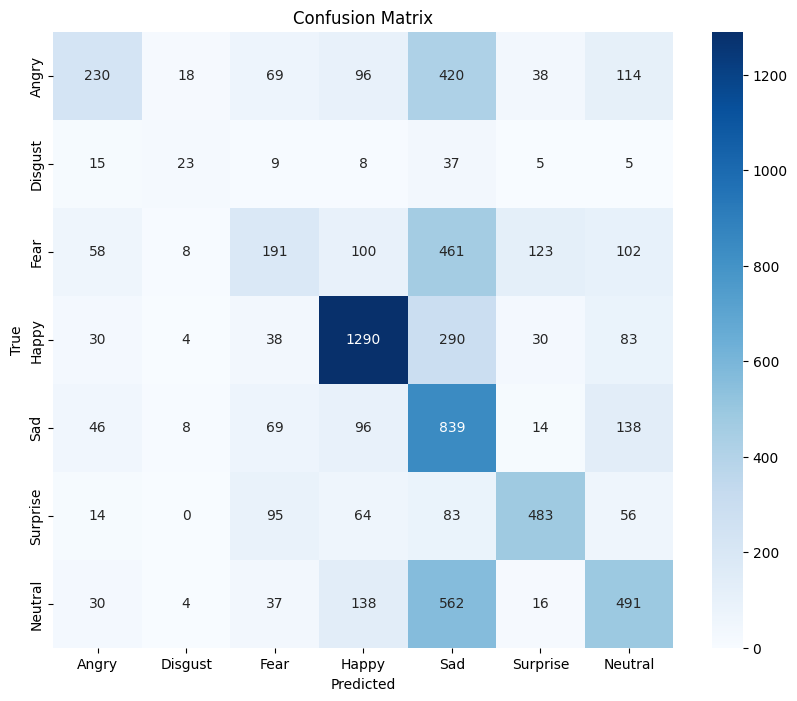

              precision    recall  f1-score   support

       Angry       0.54      0.23      0.33       985
     Disgust       0.35      0.23      0.28       102
        Fear       0.38      0.18      0.25      1043
       Happy       0.72      0.73      0.73      1765
         Sad       0.31      0.69      0.43      1210
    Surprise       0.68      0.61      0.64       795
     Neutral       0.50      0.38      0.43      1278

    accuracy                           0.49      7178
   macro avg       0.50      0.44      0.44      7178
weighted avg       0.53      0.49      0.48      7178

Epoch 26:
Train Loss: 0.9056, Acc: 0.4868
Val Loss: 0.8710, Acc: 0.4941
LR: 0.002069


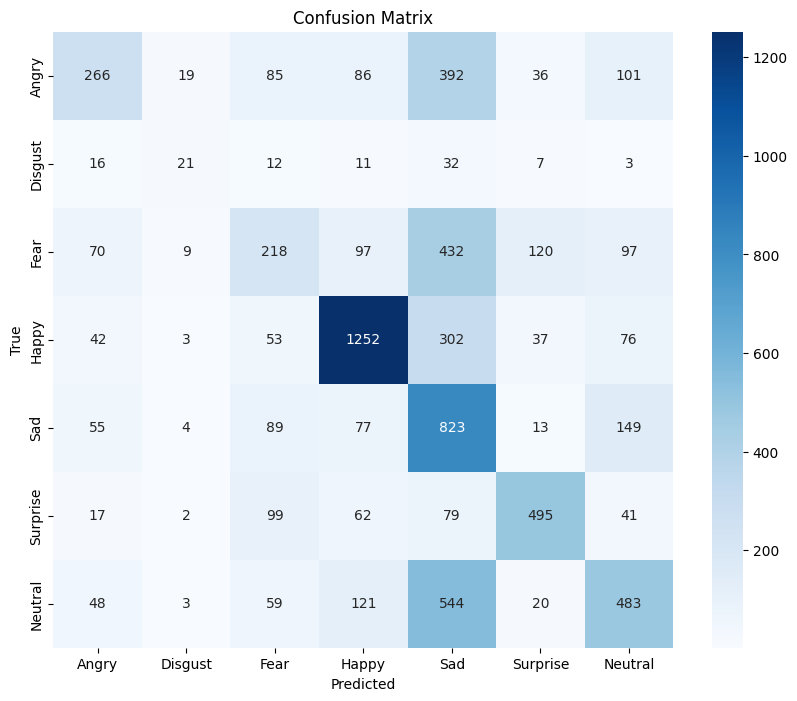

              precision    recall  f1-score   support

       Angry       0.52      0.27      0.35       985
     Disgust       0.34      0.21      0.26       102
        Fear       0.35      0.21      0.26      1043
       Happy       0.73      0.71      0.72      1765
         Sad       0.32      0.68      0.43      1210
    Surprise       0.68      0.62      0.65       795
     Neutral       0.51      0.38      0.43      1278

    accuracy                           0.50      7178
   macro avg       0.49      0.44      0.44      7178
weighted avg       0.53      0.50      0.49      7178

Epoch 27:
Train Loss: 0.9049, Acc: 0.4861
Val Loss: 0.8744, Acc: 0.4957
LR: 0.002737


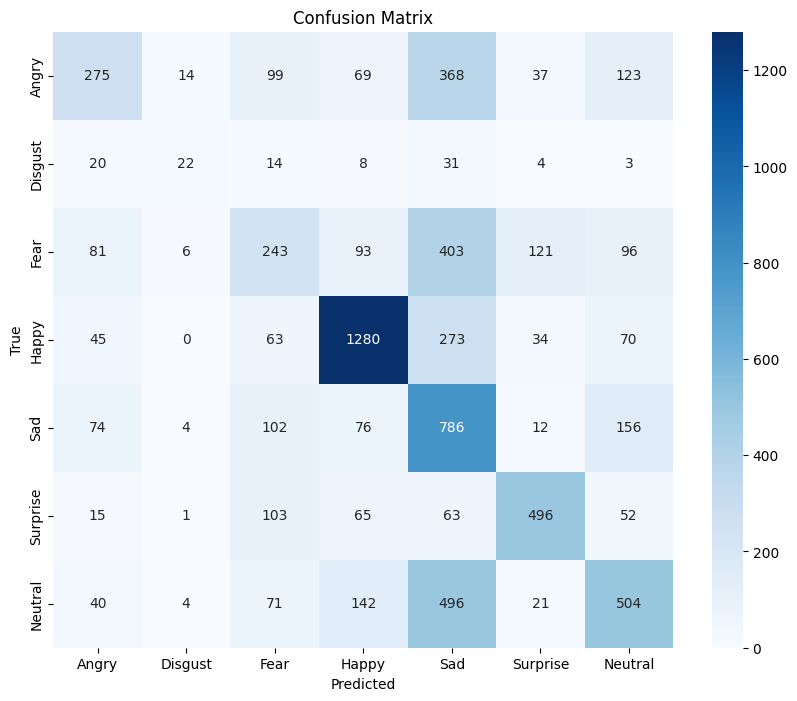

              precision    recall  f1-score   support

       Angry       0.50      0.28      0.36       985
     Disgust       0.43      0.22      0.29       102
        Fear       0.35      0.23      0.28      1043
       Happy       0.74      0.73      0.73      1765
         Sad       0.32      0.65      0.43      1210
    Surprise       0.68      0.62      0.65       795
     Neutral       0.50      0.39      0.44      1278

    accuracy                           0.50      7178
   macro avg       0.50      0.45      0.45      7178
weighted avg       0.53      0.50      0.50      7178

Epoch 28:
Train Loss: 0.9046, Acc: 0.4863
Val Loss: 0.8642, Acc: 0.5024
LR: 0.003461


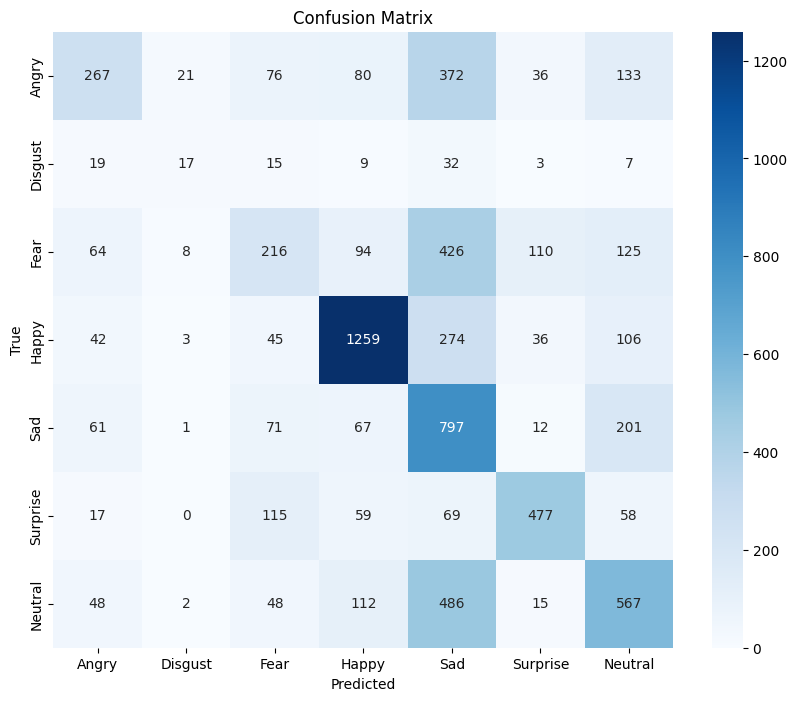

              precision    recall  f1-score   support

       Angry       0.52      0.27      0.36       985
     Disgust       0.33      0.17      0.22       102
        Fear       0.37      0.21      0.27      1043
       Happy       0.75      0.71      0.73      1765
         Sad       0.32      0.66      0.43      1210
    Surprise       0.69      0.60      0.64       795
     Neutral       0.47      0.44      0.46      1278

    accuracy                           0.50      7178
   macro avg       0.49      0.44      0.44      7178
weighted avg       0.53      0.50      0.50      7178

Epoch 29:
Train Loss: 0.9021, Acc: 0.4857
Val Loss: 0.8627, Acc: 0.5015
LR: 0.004224


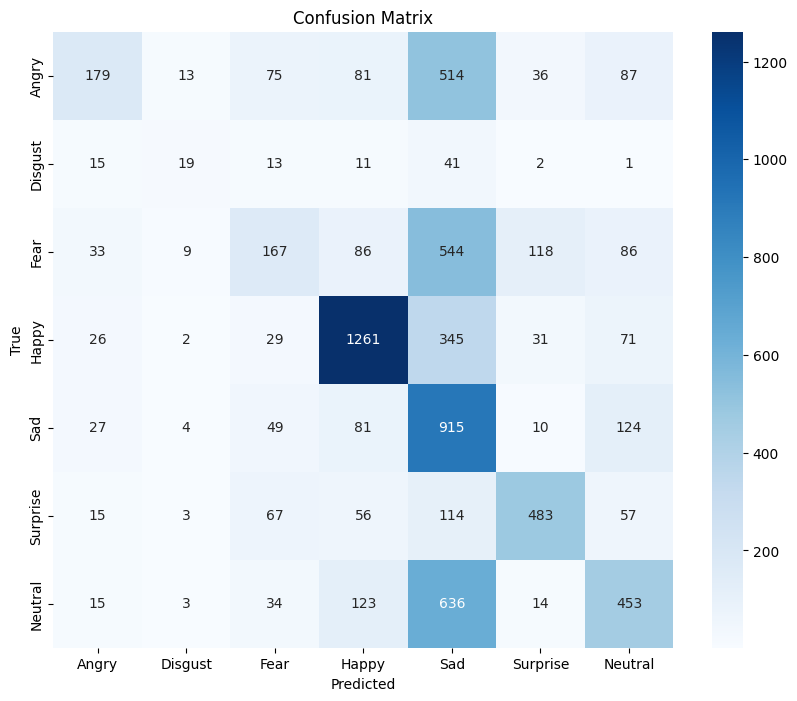

              precision    recall  f1-score   support

       Angry       0.58      0.18      0.28       985
     Disgust       0.36      0.19      0.25       102
        Fear       0.38      0.16      0.23      1043
       Happy       0.74      0.71      0.73      1765
         Sad       0.29      0.76      0.42      1210
    Surprise       0.70      0.61      0.65       795
     Neutral       0.52      0.35      0.42      1278

    accuracy                           0.48      7178
   macro avg       0.51      0.42      0.42      7178
weighted avg       0.54      0.48      0.47      7178

Epoch 30:
Train Loss: 0.9036, Acc: 0.4856
Val Loss: 0.8734, Acc: 0.4844
LR: 0.005005


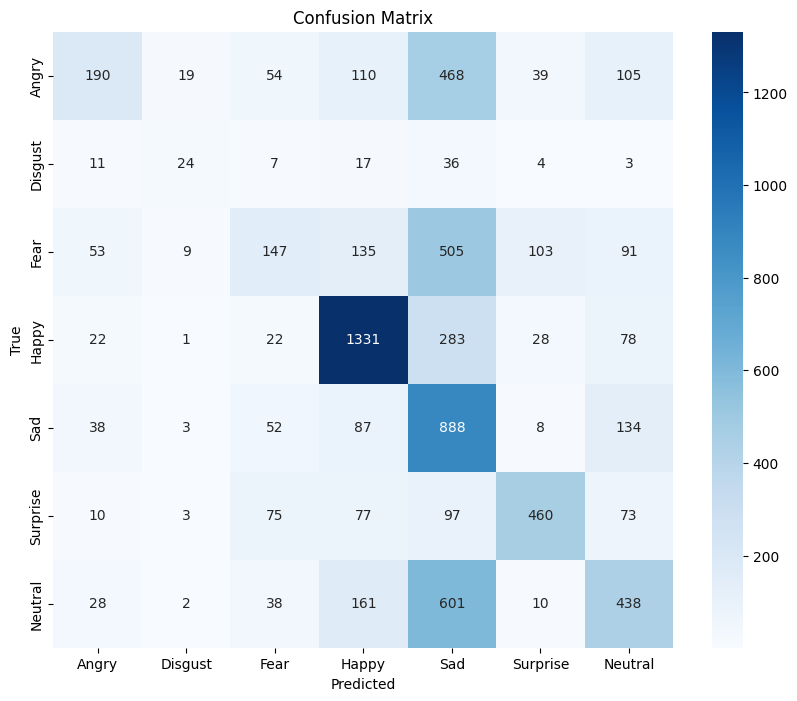

              precision    recall  f1-score   support

       Angry       0.54      0.19      0.28       985
     Disgust       0.39      0.24      0.29       102
        Fear       0.37      0.14      0.20      1043
       Happy       0.69      0.75      0.72      1765
         Sad       0.31      0.73      0.43      1210
    Surprise       0.71      0.58      0.64       795
     Neutral       0.48      0.34      0.40      1278

    accuracy                           0.48      7178
   macro avg       0.50      0.43      0.42      7178
weighted avg       0.52      0.48      0.47      7178

Epoch 31:
Train Loss: 0.9017, Acc: 0.4833
Val Loss: 0.8882, Acc: 0.4845
LR: 0.005786


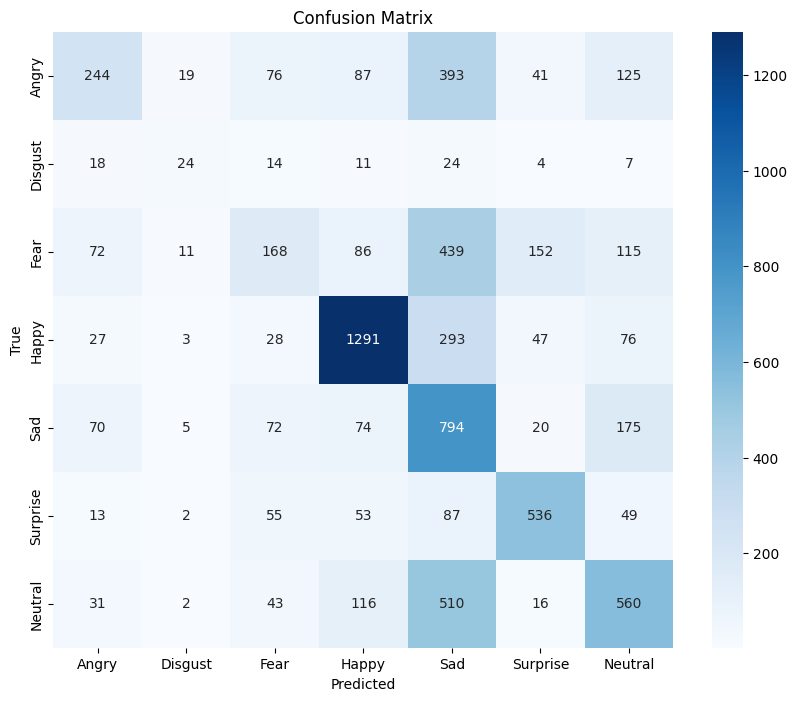

              precision    recall  f1-score   support

       Angry       0.51      0.25      0.33       985
     Disgust       0.36      0.24      0.29       102
        Fear       0.37      0.16      0.22      1043
       Happy       0.75      0.73      0.74      1765
         Sad       0.31      0.66      0.42      1210
    Surprise       0.66      0.67      0.67       795
     Neutral       0.51      0.44      0.47      1278

    accuracy                           0.50      7178
   macro avg       0.50      0.45      0.45      7178
weighted avg       0.53      0.50      0.49      7178

Epoch 32:
Train Loss: 0.8995, Acc: 0.4896
Val Loss: 0.8526, Acc: 0.5039
LR: 0.006549


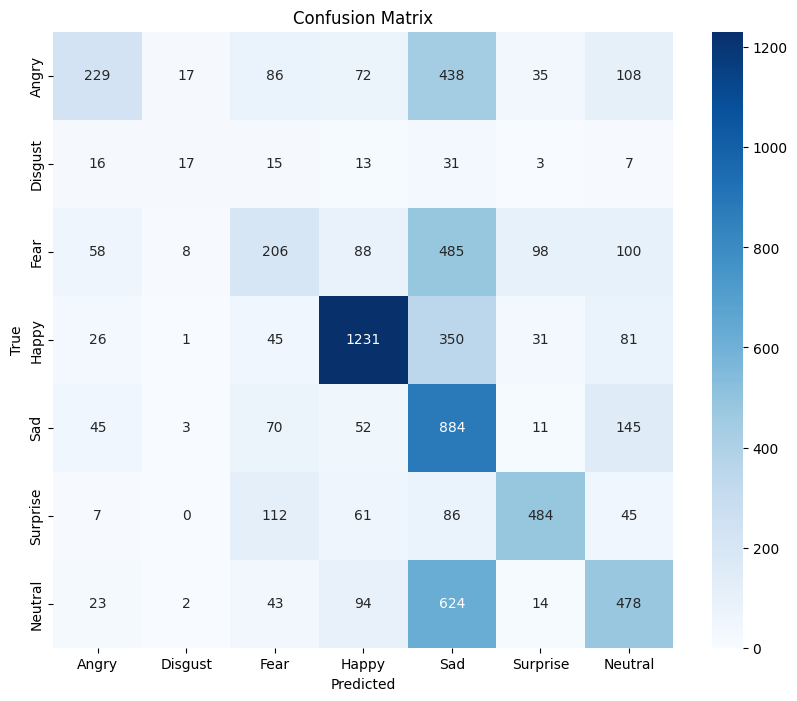

              precision    recall  f1-score   support

       Angry       0.57      0.23      0.33       985
     Disgust       0.35      0.17      0.23       102
        Fear       0.36      0.20      0.25      1043
       Happy       0.76      0.70      0.73      1765
         Sad       0.31      0.73      0.43      1210
    Surprise       0.72      0.61      0.66       795
     Neutral       0.50      0.37      0.43      1278

    accuracy                           0.49      7178
   macro avg       0.51      0.43      0.44      7178
weighted avg       0.54      0.49      0.49      7178

Epoch 33:
Train Loss: 0.9001, Acc: 0.4859
Val Loss: 0.8634, Acc: 0.4916
LR: 0.007273


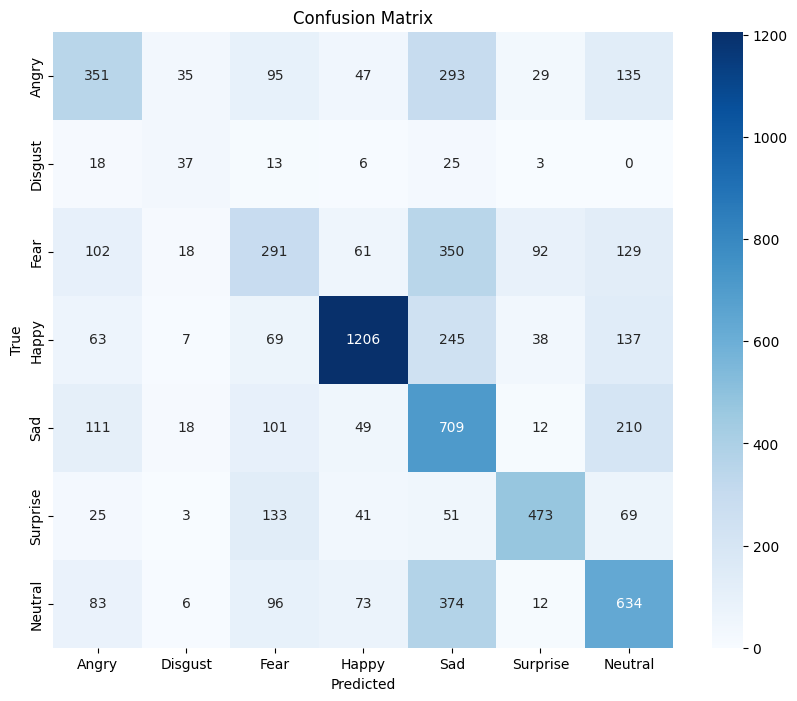

              precision    recall  f1-score   support

       Angry       0.47      0.36      0.40       985
     Disgust       0.30      0.36      0.33       102
        Fear       0.36      0.28      0.32      1043
       Happy       0.81      0.68      0.74      1765
         Sad       0.35      0.59      0.44      1210
    Surprise       0.72      0.59      0.65       795
     Neutral       0.48      0.50      0.49      1278

    accuracy                           0.52      7178
   macro avg       0.50      0.48      0.48      7178
weighted avg       0.54      0.52      0.52      7178

Epoch 34:
Train Loss: 0.8922, Acc: 0.4899
Val Loss: 0.8342, Acc: 0.5156
LR: 0.007941


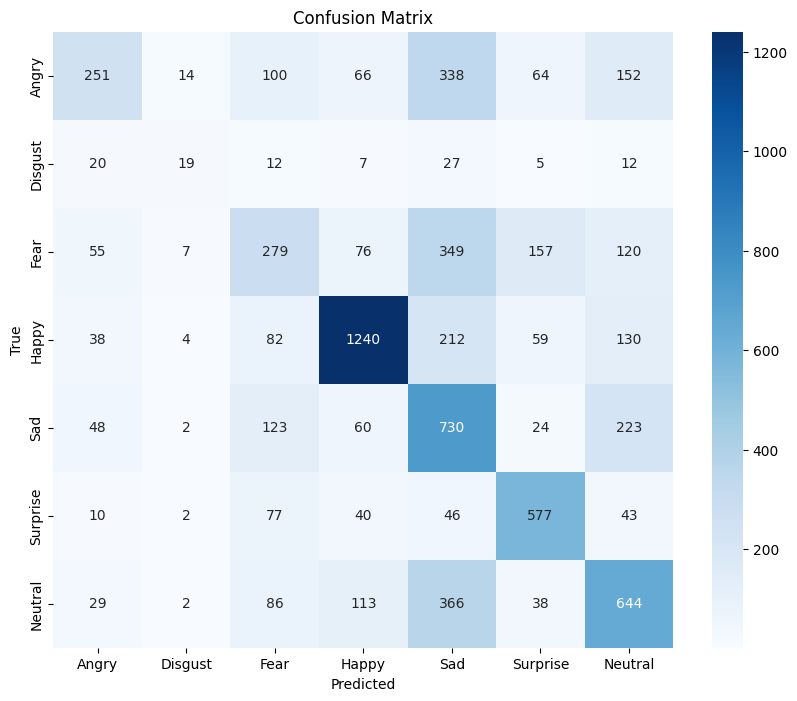

              precision    recall  f1-score   support

       Angry       0.56      0.25      0.35       985
     Disgust       0.38      0.19      0.25       102
        Fear       0.37      0.27      0.31      1043
       Happy       0.77      0.70      0.74      1765
         Sad       0.35      0.60      0.45      1210
    Surprise       0.62      0.73      0.67       795
     Neutral       0.49      0.50      0.50      1278

    accuracy                           0.52      7178
   macro avg       0.51      0.46      0.47      7178
weighted avg       0.54      0.52      0.52      7178

Epoch 35:
Train Loss: 0.8892, Acc: 0.4931
Val Loss: 0.8288, Acc: 0.5210
LR: 0.008537


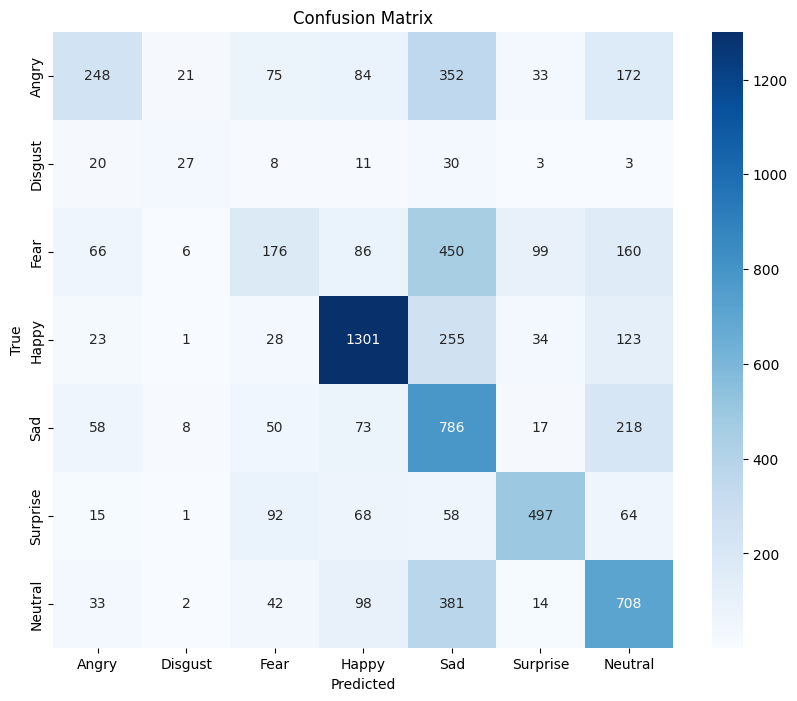

              precision    recall  f1-score   support

       Angry       0.54      0.25      0.34       985
     Disgust       0.41      0.26      0.32       102
        Fear       0.37      0.17      0.23      1043
       Happy       0.76      0.74      0.75      1765
         Sad       0.34      0.65      0.45      1210
    Surprise       0.71      0.63      0.67       795
     Neutral       0.49      0.55      0.52      1278

    accuracy                           0.52      7178
   macro avg       0.52      0.46      0.47      7178
weighted avg       0.54      0.52      0.51      7178

Epoch 36:
Train Loss: 0.8850, Acc: 0.4942
Val Loss: 0.8352, Acc: 0.5215
LR: 0.009046


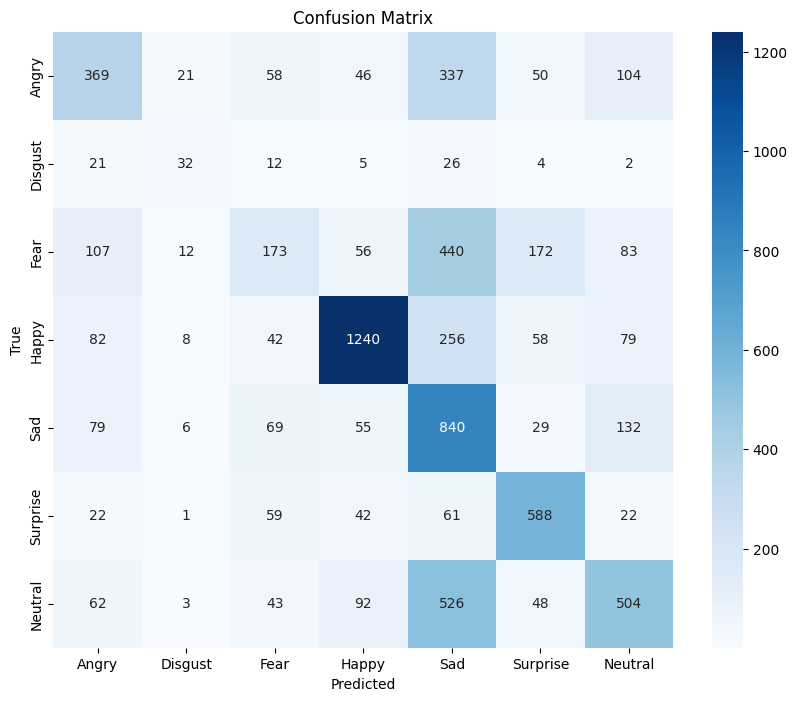

              precision    recall  f1-score   support

       Angry       0.50      0.37      0.43       985
     Disgust       0.39      0.31      0.35       102
        Fear       0.38      0.17      0.23      1043
       Happy       0.81      0.70      0.75      1765
         Sad       0.34      0.69      0.45      1210
    Surprise       0.62      0.74      0.67       795
     Neutral       0.54      0.39      0.46      1278

    accuracy                           0.52      7178
   macro avg       0.51      0.48      0.48      7178
weighted avg       0.55      0.52      0.51      7178

Epoch 37:
Train Loss: 0.8767, Acc: 0.4930
Val Loss: 0.8216, Acc: 0.5219
LR: 0.009456


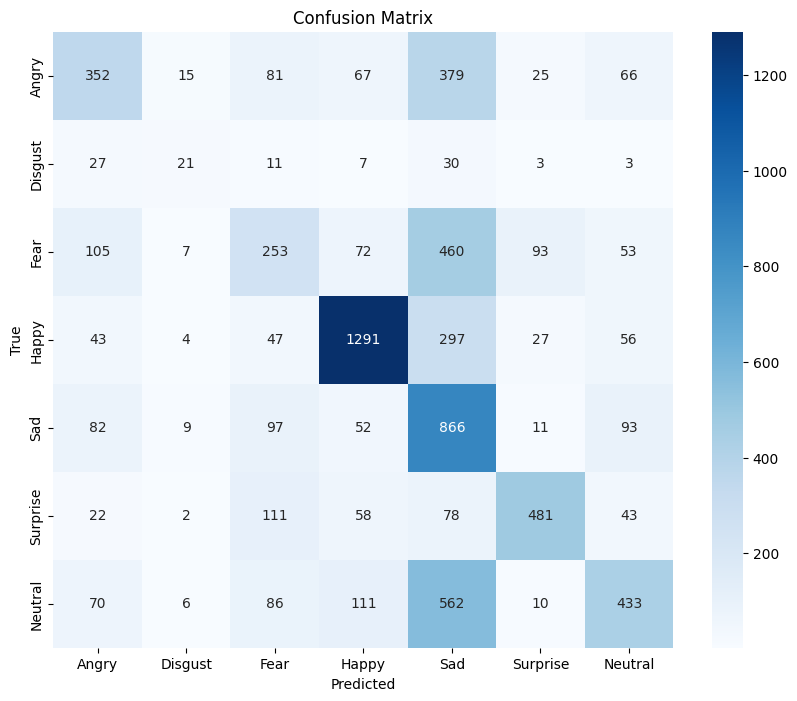

              precision    recall  f1-score   support

       Angry       0.50      0.36      0.42       985
     Disgust       0.33      0.21      0.25       102
        Fear       0.37      0.24      0.29      1043
       Happy       0.78      0.73      0.75      1765
         Sad       0.32      0.72      0.45      1210
    Surprise       0.74      0.61      0.67       795
     Neutral       0.58      0.34      0.43      1278

    accuracy                           0.52      7178
   macro avg       0.52      0.46      0.47      7178
weighted avg       0.56      0.52      0.51      7178

Epoch 38:
Train Loss: 0.8723, Acc: 0.4956
Val Loss: 0.8223, Acc: 0.5150
LR: 0.009756


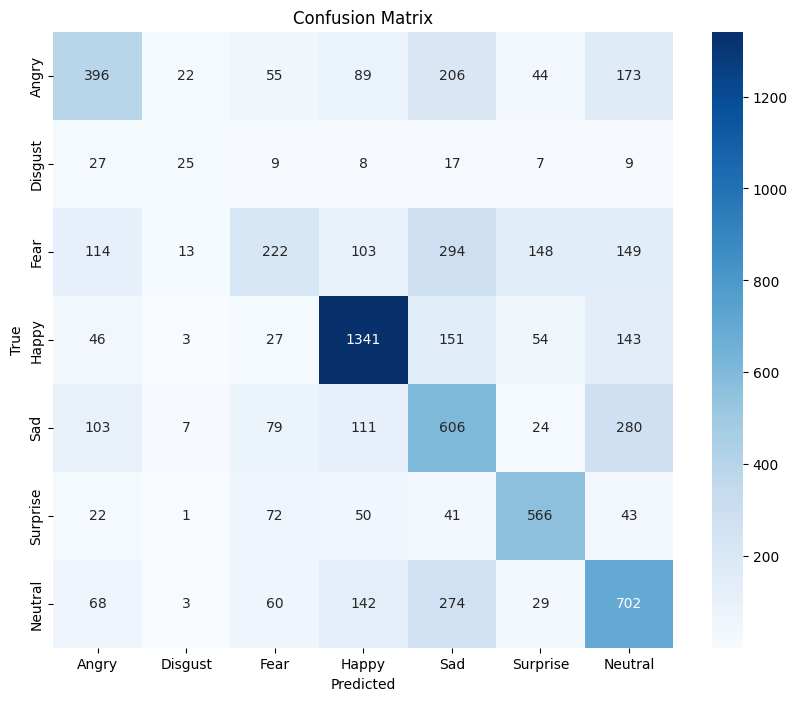

              precision    recall  f1-score   support

       Angry       0.51      0.40      0.45       985
     Disgust       0.34      0.25      0.28       102
        Fear       0.42      0.21      0.28      1043
       Happy       0.73      0.76      0.74      1765
         Sad       0.38      0.50      0.43      1210
    Surprise       0.65      0.71      0.68       795
     Neutral       0.47      0.55      0.51      1278

    accuracy                           0.54      7178
   macro avg       0.50      0.48      0.48      7178
weighted avg       0.53      0.54      0.53      7178

Epoch 39:
Train Loss: 0.8645, Acc: 0.5021
Val Loss: 0.8176, Acc: 0.5375
LR: 0.009939


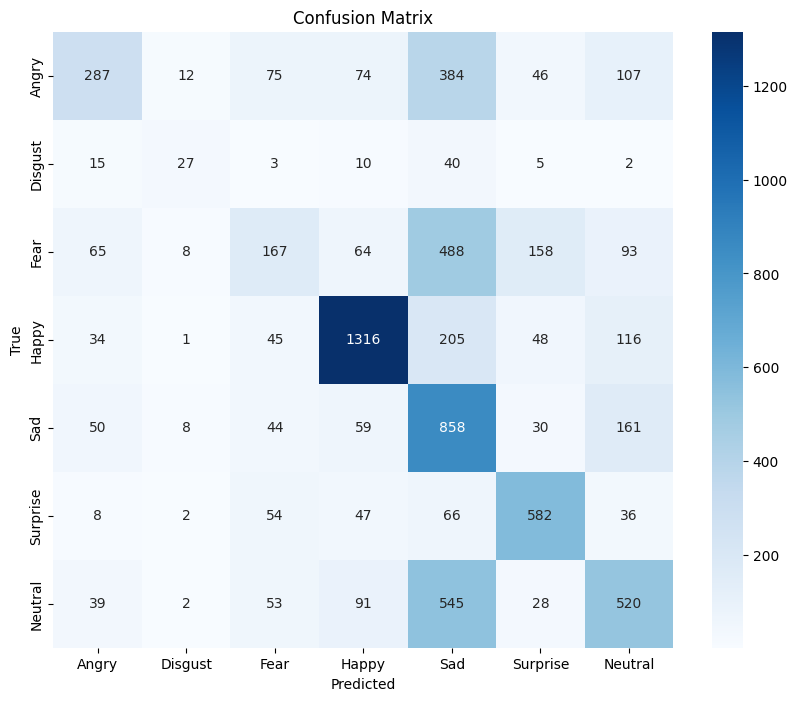

              precision    recall  f1-score   support

       Angry       0.58      0.29      0.39       985
     Disgust       0.45      0.26      0.33       102
        Fear       0.38      0.16      0.23      1043
       Happy       0.79      0.75      0.77      1765
         Sad       0.33      0.71      0.45      1210
    Surprise       0.65      0.73      0.69       795
     Neutral       0.50      0.41      0.45      1278

    accuracy                           0.52      7178
   macro avg       0.53      0.47      0.47      7178
weighted avg       0.55      0.52      0.51      7178

Epoch 40:
Train Loss: 0.8613, Acc: 0.5031
Val Loss: 0.8142, Acc: 0.5234
LR: 0.010000
Best Validation Accuracy: 0.5375


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,███▇▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁▁▁▁▁▂▂▂▃▃▄▅▅▆▆▇▇▇████
train_acc,▁▂▃▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇█▇███▇██████▇█████████
train_loss,█▇▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_acc,▁▂▃▄▄▅▅▅▆▅▆▆▆▆▇▆▇▆▆▇▇▇▇▇▇▇▇▇▇▆▆▇▇▇███▇██
val_loss,█▇▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,40
lr,0.01
train_acc,0.50308
train_loss,0.86133
val_acc,0.5234


In [29]:
from PIL import Image  # This is the crucial missing import

# Main training loop
best_acc = 0.0
patience = 7
no_improve = 0

for epoch in range(40):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Update learning rate
    scheduler.step()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total

    # Validation
    val_loss, val_acc = evaluate_model(model, val_loader, criterion)

    # Log to W&B
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": train_loss,
        "train_acc": train_acc,
        "val_loss": val_loss,
        "val_acc": val_acc,
        "lr": optimizer.param_groups[0]["lr"]
    })

    # Early stopping
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"No improvement for {patience} epochs, stopping early!")
            break

    print(f'Epoch {epoch+1}:')
    print(f'Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}')
    print(f'LR: {optimizer.param_groups[0]["lr"]:.6f}')

print(f'Best Validation Accuracy: {best_acc:.4f}')
wandb.finish()